# SUPERCARS DATA ANALYSIS

### Project By : Shaikh Mohammed Adnan
### Trainer : Rajshri Thete
### Batch :8220

### Introduction
The primary objective of this project was to analyze sales, customer demographics, and car-related data to extract meaningful insights and visualizations that can help in understanding sales trends, customer preferences, and manufacturer performance.The project used three datasets: customers, cars, and sales. These datasets were first cleaned and preprocessed to ensure consistency in column names and formats. After cleaning, the data was merged using customer_id and car_id as common keys, allowing for comprehensive analysis across the different datasets.

Technologies Used:

Python (Pandas, Matplotlib, Seaborn) was used for data manipulation and visualization.

Jupyter Notebook was used as the development environment for analysis and generating plots.

This analysis provides a data-driven approach to understanding customer behavior, market trends, and product performance, helping stakeholders make informed decisions.

### Objective
The objective of this project is to analyze sales, customer, and car data to uncover insights that can guide business decisions. Specifically, the project aims to:

1. Understand Sales Trends: Analyze how sales fluctuate over time and identify which car models and manufacturers are performing best.

2. Customer Demographics and Behavior: Explore customer demographics (such as age) to understand the profile of customers making purchases, their preferences, and spending habits.

3. Product Performance: Assess the performance of different car models and manufacturers to identify top-sellers and trends in product demand.

4. Customer Retention and Patterns: Examine customer behavior to distinguish between new and returning customers, and analyze how frequently they make purchases.

5. Visualize Data for Decision-Making: Create visualizations that make it easier for stakeholders to interpret the data, revealing actionable insights such as which age groups spend the most or which times of day are busiest for sales.

Overall, the project leverages data analytics to provide a comprehensive overview of car sales performance, customer behavior, and market trends, supporting better decision-making in sales strategies and customer targeting.

### Import Libraries

In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Optional for interactive plots
import plotly.express as px



#### Insight : Import the following libraries for data processing,database interaction, and visualization

In [2]:
cnx = mysql.connector.connect(
user='root',
password='adnan@123',
host='localhost',
database='cars' 
)

In [3]:
cursor = cnx.cursor

In [4]:
import mysql.connector

# Connect to the database
cnx = mysql.connector.connect(
    user='root',
    password='adnan@123',
    host='localhost',
    database='cars'
)

# Create a cursor
cursor = cnx.cursor()

# Execute the query
cursor.execute("SELECT * FROM cars")

# Fetch results
results = cursor.fetchall()

# Print the results
for row in results:
    print(row)

# Close the cursor and connection
cursor.close()
cnx.close()

(1, 'LaFerrari', 'Ferrari', 'Supercar', Decimal('2000000.00'))
(2, 'Porsche 918 Spyder', 'Porsche', 'Supercar', Decimal('1800000.00'))
(3, 'McLaren P1', 'McLaren', 'Supercar', Decimal('1500000.00'))
(4, 'Bugatti Chiron', 'Bugatti', 'Supercar', Decimal('3000000.00'))
(5, 'Lamborghini Aventador', 'Lamborghini', 'Supercar', Decimal('450000.00'))
(6, 'Koenigsegg Agera RS', 'Koenigsegg', 'Supercar', Decimal('2500000.00'))
(7, 'Pagani Huayra', 'Pagani', 'Supercar', Decimal('2600000.00'))
(8, 'Aston Martin Valkyrie', 'Aston Martin', 'Supercar', Decimal('3000000.00'))
(9, 'Ferrari 488 Pista', 'Ferrari', 'Supercar', Decimal('350000.00'))
(10, 'McLaren 720S', 'McLaren', 'Supercar', Decimal('300000.00'))
(11, 'Lamborghini Huracán Performante', 'Lamborghini', 'Supercar', Decimal('400000.00'))
(12, 'Mercedes-AMG One', 'Mercedes-Benz', 'Supercar', Decimal('2700000.00'))
(13, 'Ford GT', 'Ford', 'Supercar', Decimal('500000.00'))
(14, 'Nissan GT-R Nismo', 'Nissan', 'Supercar', Decimal('210000.00'))
(15

In [5]:
customers_data = {
    'customer_id': range(1, 51),
    'customer_name': ['Alice Smith', 'Bob Johnson', 'Charlie Lee', 'Dana White', 'Evelyn Green', 
                      'Frank Black', 'Gina Adams', 'Henry Walker', 'Isabel Martinez', 'Jack Davis',
                      'Laura Wilson', 'Michael Thompson', 'Nina Patel', 'Oliver Brown', 'Penny Robinson', 
                      'Quinn Clark', 'Ryan Lewis', 'Sophie Hall', 'Tom Harris', 'Uma Young', 'Victor King', 
                      'Wendy Wright', 'Xander Scott', 'Yara Moore', 'Zane Taylor', 'Ava Lee', 'Brandon Harris', 
                      'Carmen Evans', 'Derek Lewis', 'Eva Baker', 'Felix Turner', 'Grace Mitchell', 'Henry Roberts',
                      'Ivy Carter', 'James Bennett', 'Kimberly Hughes', 'Liam Green', 'Maya Collins', 
                      'Nathan Price', 'Olivia Ward', 'Peter Diaz', 'Quincy Scott', 'Rita Ramirez', 
                      'Sam Nelson', 'Tina Wood', 'Ulysses Griffin', 'Vanessa Morales', 'Walter Reyes', 
                      'Xena Hayes', 'Yosef Sanders'],
    'gender': ['F', 'M', 'M', 'F', 'F', 'M', 'O', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'F', 
               'O', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'M', 'F', 'M', 'F', 
               'M', 'F', 'M', 'M', 'M', 'M', 'F', 'M', 'M', 'M', 'F', 'F', 'M', 'F', 'M', 'F', 
               'M', 'M', 'M'],
    'age': [28, 35, 22, 30, 45, 50, 27, 19, 33, 29, 40, 31, 26, 38, 24, 37, 42, 34, 23, 29, 
            39, 46, 28, 31, 50, 32, 27, 36, 44, 25, 30, 41, 29, 38, 22, 34, 48, 27, 35, 26, 
            49, 41, 41, 30, 36, 25, 39, 27, 18, 16],
    'location': ['New York', 'Los Angeles', 'Chicago', 'Miami', 'Houston', 'San Francisco', 'Seattle', 
                 'Austin', 'Phoenix', 'Philadelphia', 'Dallas', 'San Diego', 'San Jose', 'Jacksonville', 
                 'Columbus', 'Charlotte', 'Fort Worth', 'Indianapolis', 'San Antonio', 'San Francisco', 
                 'Seattle', 'Denver', 'Boston', 'El Paso', 'Detroit', 'Las Vegas', 'Baltimore', 
                 'Milwaukee', 'Tucson', 'Fresno', 'Sacramento', 'Long Beach', 'Kansas City', 'Mesa', 
                 'Virginia Beach', 'Atlanta', 'Colorado Springs', 'Omaha', 'Raleigh', 'Miami', 
                 'Virginia Beach', 'Cleveland', 'Tampa', 'Pittsburgh', 'Atlanta', 'New Orleans', 
                 'Minneapolis', 'Wichita', 'Arlington', 'Bakersfield']
}

cars_data = {
    'car_id': range(1, 51),
    'car_model': ['LaFerrari', 'Porsche 918 Spyder', 'McLaren P1', 'Bugatti Chiron', 'Lamborghini Aventador', 
                  'Koenigsegg Agera RS', 'Pagani Huayra', 'Aston Martin Valkyrie', 'Ferrari 488 Pista', 
                  'McLaren 720S', 'Lamborghini Huracán Performante', 'Mercedes-AMG One', 'Ford GT', 
                  'Nissan GT-R Nismo', 'Chevrolet Corvette ZR1', 'Jaguar C-X75', 'Lotus Evija', 
                  'Pininfarina Battista', 'Rimac C_Two', 'Aston Martin DBS Superleggera', 'Bugatti Veyron', 
                  'Pagani Zonda', 'Koenigsegg Regera', 'McLaren Speedtail', 'Ferrari F8 Tributo', 
                  'Lamborghini Centenario', 'Maserati MC20', 'Porsche 911 GT2 RS', 'Dodge Viper ACR', 
                  'BMW i8', 'Toyota Supra GR', 'Alfa Romeo 4C', 'Mercedes-Benz SLS AMG', 'Noble M600', 
                  'Gumpert Apollo', 'Caterham 620R', 'Ruf CTR', 'Lotus Elise', 'Ferrari 812 Superfast', 
                  'Lamborghini Urus', 'Mclaren GT', 'Aston Martin Vantage', 'Porsche 911 Turbo S', 
                  'Ford Mustang Shelby GT500', 'Chevrolet Camaro ZL1', 'Tesla Roadster', 'Lamborghini Countach', 
                  'Mercedes-Benz AMG GT Black Series', 'Toyota GR Supra', 'McLaren Artura'],
    'manufacturer': ['Ferrari', 'Porsche', 'McLaren', 'Bugatti', 'Lamborghini', 'Koenigsegg', 'Pagani', 
                    'Aston Martin', 'Ferrari', 'McLaren', 'Lamborghini', 'Mercedes-Benz', 'Ford', 
                    'Nissan', 'Chevrolet', 'Jaguar', 'Lotus', 'Pininfarina', 'Rimac', 'Aston Martin', 
                    'Bugatti', 'Pagani', 'Koenigsegg', 'McLaren', 'Ferrari', 'Lamborghini', 'Maserati', 
                    'Porsche', 'Dodge', 'BMW', 'Toyota', 'Alfa Romeo', 'Mercedes-Benz', 'Noble', 
                    'Gumpert', 'Caterham', 'Ruf', 'Lotus', 'Ferrari', 'Lamborghini', 'McLaren', 
                    'Aston Martin', 'Porsche', 'Ford', 'Chevrolet', 'Tesla', 'Lamborghini', 
                    'Mercedes-Benz', 'Toyota', 'McLaren'],
    'category': ['Supercar'] * 50,
    'price': [2000000.00, 1800000.00, 1500000.00, 3000000.00, 450000.00, 2500000.00, 2600000.00, 
              3000000.00, 350000.00, 300000.00, 400000.00, 2700000.00, 500000.00, 210000.00, 
              120000.00, 2000000.00, 2000000.00, 2000000.00, 2000000.00, 316000.00, 1800000.00, 
              1400000.00, 2000000.00, 2500000.00, 280000.00, 2000000.00, 210000.00, 300000.00, 
              120000.00, 150000.00, 50000.00, 60000.00, 200000.00, 300000.00, 450000.00, 100000.00, 
              800000.00, 60000.00, 335000.00, 200000.00, 210000.00, 140000.00, 207000.00, 70000.00, 
              65000.00, 200000.00, 300000.00, 325000.00, 50000.00, 225000.00]
}

sales_data = {
    'sale_id': range(1, 51),
    'customer_id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 
                    19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 
                    35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
}

In [33]:

# Create DataFrames
customers_df = pd.DataFrame({
    'customers_id': range(1, 51)
})

cars_df = pd.DataFrame({
    'car_id': range(1, 51)
})

sales_df = pd.DataFrame({
    'sale_id': range(1, 51),
    'customers_id': range(1, 51),
    'car_id': range(1, 51),
    'sale_date': pd.date_range(start='2024-01-01', periods=50, freq='D')
})

In [34]:
print(customers_df.columns)
print(cars_df.columns)
print(sales_df.columns)

Index(['customers_id'], dtype='object')
Index(['car_id'], dtype='object')
Index(['sale_id', 'customers_id', 'car_id', 'sale_date'], dtype='object')


In [35]:
print(customers_df.head())
print(cars_df.head())
print(sales_df.head())

   customers_id
0             1
1             2
2             3
3             4
4             5
   car_id
0       1
1       2
2       3
3       4
4       5
   sale_id  customers_id  car_id  sale_date
0        1             1       1 2024-01-01
1        2             2       2 2024-01-02
2        3             3       3 2024-01-03
3        4             4       4 2024-01-04
4        5             5       5 2024-01-05


In [36]:
# Display first few rows of sales_df
print("\nSales DataFrame Preview:")
print(sales_df.head(10))  # Displaying more rows for better inspection


Sales DataFrame Preview:
   sale_id  customers_id  car_id  sale_date
0        1             1       1 2024-01-01
1        2             2       2 2024-01-02
2        3             3       3 2024-01-03
3        4             4       4 2024-01-04
4        5             5       5 2024-01-05
5        6             6       6 2024-01-06
6        7             7       7 2024-01-07
7        8             8       8 2024-01-08
8        9             9       9 2024-01-09
9       10            10      10 2024-01-10


In [37]:
# Print the column names of each DataFrame to find potential issues
print("Sales DataFrame Columns:")
print(sales_df.columns.tolist())

print("\nCustomers DataFrame Columns:")
print(customers_df.columns.tolist())

print("\nCars DataFrame Columns:")
print(cars_df.columns.tolist())

Sales DataFrame Columns:
['sale_id', 'customers_id', 'car_id', 'sale_date']

Customers DataFrame Columns:
['customers_id']

Cars DataFrame Columns:
['car_id']


In [38]:
# Check unique values in customer_id
print("\nUnique Customer IDs in Sales DataFrame:")
print(sales_df['customers_id'].unique())


Unique Customer IDs in Sales DataFrame:
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50]


In [39]:
# Merge sales with customers and cars
merged_df = sales_df.merge(customers_df, on='customers_id') 
#.merge(cars_df, on='cars_id')'''

# Display the first few rows of the merged DataFrame
print(merged_df.head())

   sale_id  customers_id  car_id  sale_date
0        1             1       1 2024-01-01
1        2             2       2 2024-01-02
2        3             3       3 2024-01-03
3        4             4       4 2024-01-04
4        5             5       5 2024-01-05


In [40]:
merged_df = merged_df.merge(cars_df, on='car_id')

In [41]:
test = pd.DataFrame(cars_data)

In [42]:
merged_df = merged_df.merge(test, on='car_id')

In [43]:
merged_df.head()

,sale_id,customers_id,car_id,sale_date,car_model,manufacturer,category,price
0,1,1,1,2024-01-01,LaFerrari,Ferrari,Supercar,2000000.0
1,2,2,2,2024-01-02,Porsche 918 Spyder,Porsche,Supercar,1800000.0
2,3,3,3,2024-01-03,McLaren P1,McLaren,Supercar,1500000.0
3,4,4,4,2024-01-04,Bugatti Chiron,Bugatti,Supercar,3000000.0
4,5,5,5,2024-01-05,Lamborghini Aventador,Lamborghini,Supercar,450000.0


In [44]:
merged_df.head()

,sale_id,customers_id,car_id,sale_date,car_model,manufacturer,category,price
0,1,1,1,2024-01-01,LaFerrari,Ferrari,Supercar,2000000.0
1,2,2,2,2024-01-02,Porsche 918 Spyder,Porsche,Supercar,1800000.0
2,3,3,3,2024-01-03,McLaren P1,McLaren,Supercar,1500000.0
3,4,4,4,2024-01-04,Bugatti Chiron,Bugatti,Supercar,3000000.0
4,5,5,5,2024-01-05,Lamborghini Aventador,Lamborghini,Supercar,450000.0


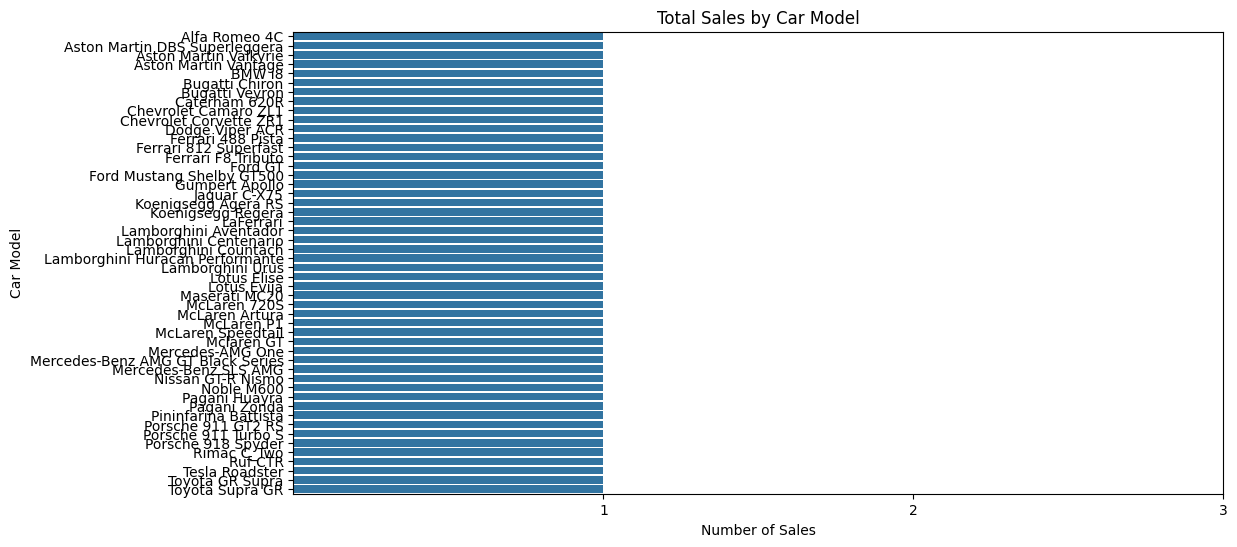

In [45]:
# Total sales by car model
sales_by_car = merged_df.groupby('car_model')['sale_id'].count().reset_index()
sales_by_car = sales_by_car.sort_values(by='sale_id', ascending=False)

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x='sale_id', y='car_model', data=sales_by_car)
plt.title('Total Sales by Car Model')
plt.xticks([1,2,3])
plt.xlabel('Number of Sales')
plt.ylabel('Car Model')
plt.show()

### Insights:

The bar chart will visually represent the total sales for each car model.
The car models will be ranked in descending order based on their total sales.
You can easily identify the top-selling car models and compare their sales performance

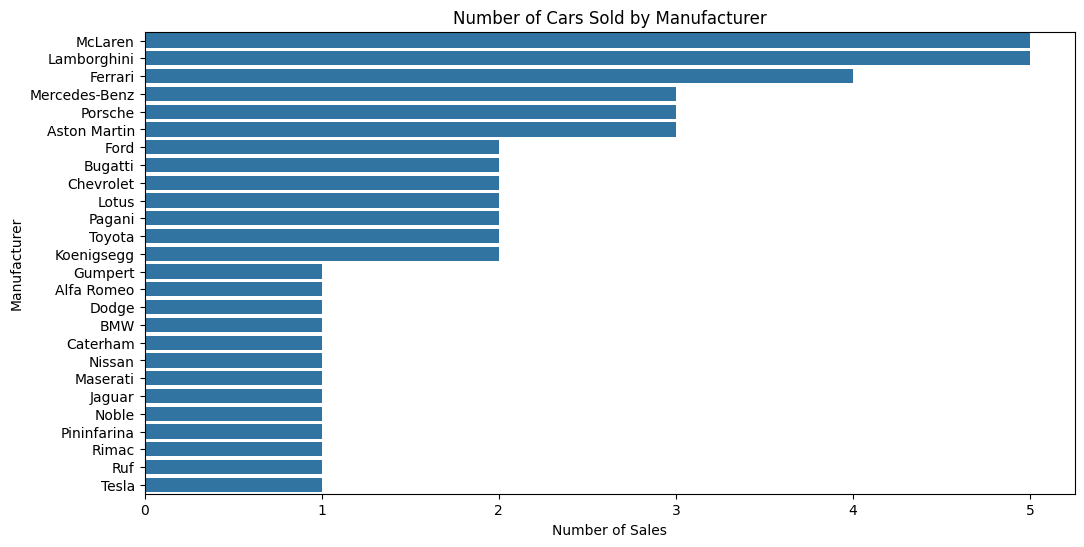

In [24]:
# Number of cars sold by manufacturer
sales_by_manufacturer = merged_df.groupby('manufacturer')['sale_id'].count().reset_index()
sales_by_manufacturer = sales_by_manufacturer.sort_values(by='sale_id', ascending=False)

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x='sale_id', y='manufacturer', data=sales_by_manufacturer)
plt.title('Number of Cars Sold by Manufacturer')
plt.xlabel('Number of Sales')
plt.ylabel('Manufacturer')
plt.show()

### Insights:

The bar chart will visually represent the total number of cars sold for each manufacturer.
The manufacturers will be ranked in descending order based on the total number of cars sold.
You can easily identify the top-selling manufacturers and compare their sales performance.

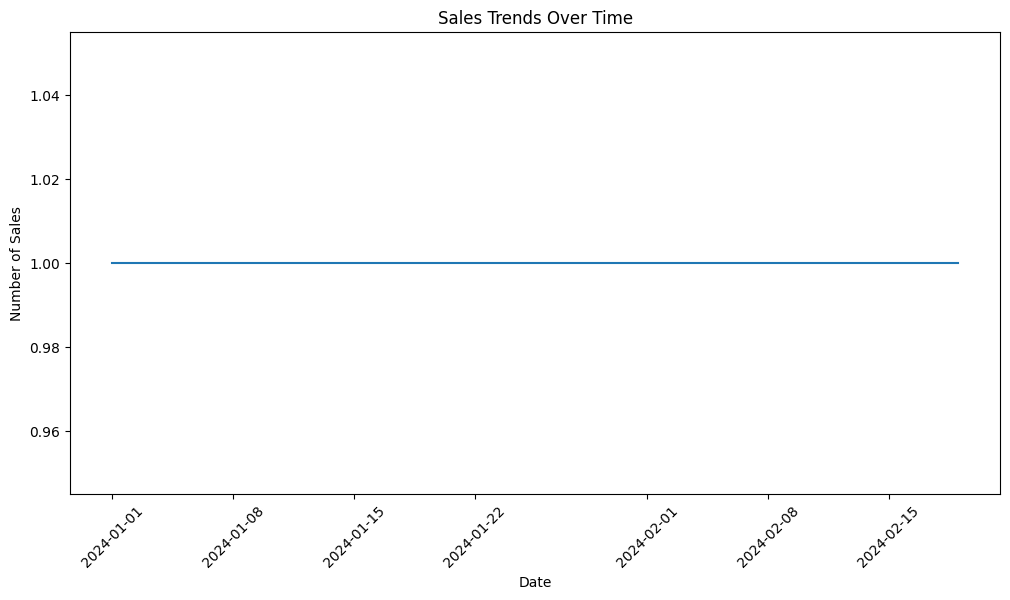

In [25]:
# Sales trends over time
sales_trend = merged_df.groupby('sale_date')['sale_id'].count().reset_index()

# Visualization
plt.figure(figsize=(12, 6))
sns.lineplot(x='sale_date', y='sale_id', data=sales_trend)
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.show()

### Insights:

The line chart will visually represent the sales trends over time.
You can observe how the number of car sales has changed over the specified period.
You can identify any patterns, trends, or fluctuations in sales.

C:\Users\admin\AppData\Local\Temp\ipykernel_408\2664388771.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_of_week', y='sale_id', data=sales_by_day, order=days_order, palette='coolwarm')


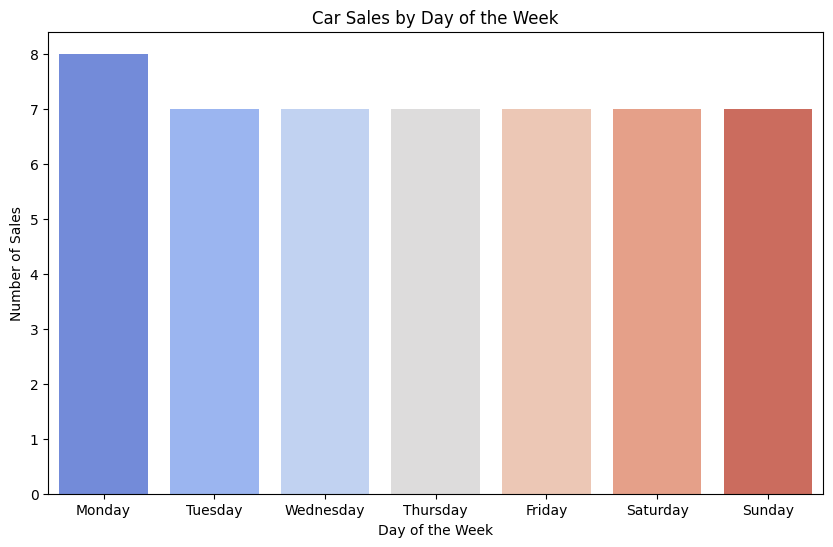

In [26]:
# Add a column for the day of the week
merged_df['day_of_week'] = merged_df['sale_date'].dt.day_name()

# Sales by day of the week
sales_by_day = merged_df.groupby('day_of_week')['sale_id'].count().reset_index()

# Order days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='sale_id', data=sales_by_day, order=days_order, palette='coolwarm')
plt.title('Car Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Sales')
plt.show()

### Insights:

The bar chart will visually represent the car sales trends by day of the week.
You can observe how the number of car sales varies across different days of the week.
You can identify the days with the highest and lowest sales.
You can analyze any patterns or trends in sales based on the day of the week.

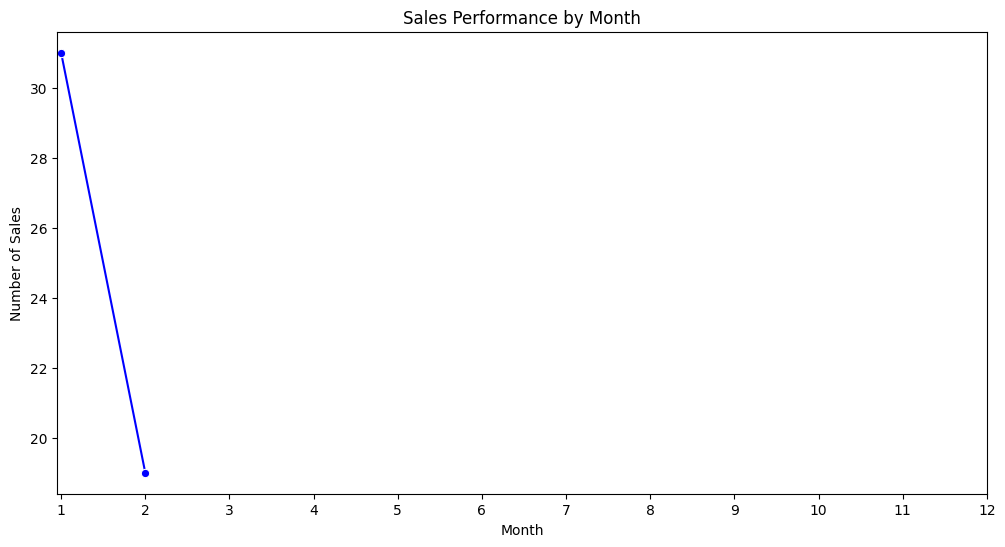

In [27]:
# Extract month from the 'sale_date' column
merged_df['sale_month'] = merged_df['sale_date'].dt.month

sales_by_month = merged_df.groupby('sale_month')['sale_id'].count().reset_index()

# Visualization
plt.figure(figsize=(12, 6))
sns.lineplot(x='sale_month', y='sale_id', data=sales_by_month, marker='o', color='b')
plt.title('Sales Performance by Month')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.xticks(range(1, 13))
plt.show()

### Insights:

The line chart will visually represent the car sales trends by month.
You can observe how the number of car sales varies across different months.
You can identify the months with the highest and lowest sales.
You can analyze any patterns or trends in sales based on the month.

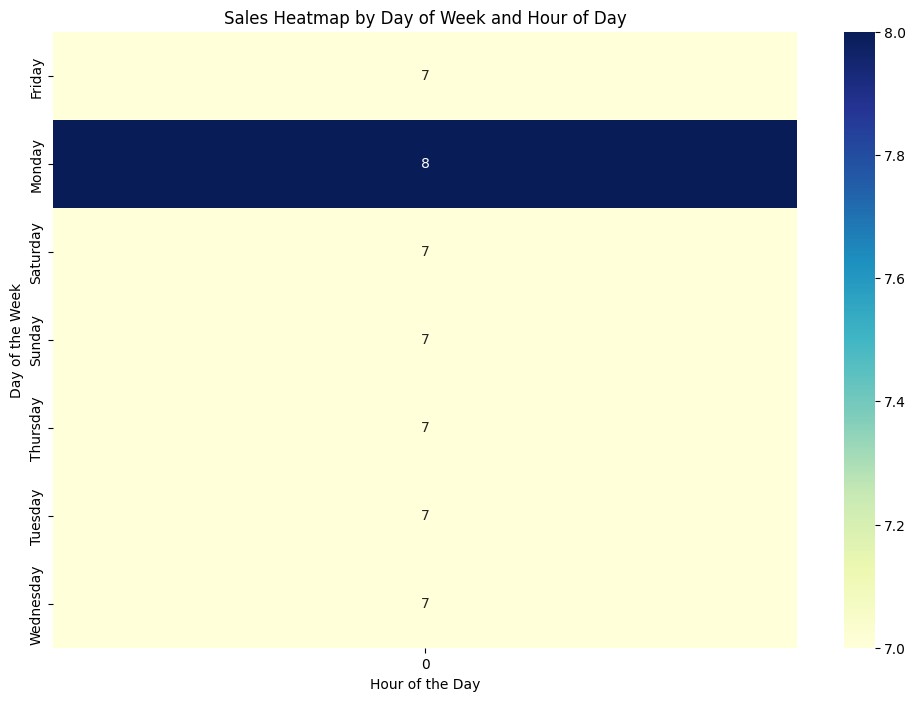

In [29]:
# Extract hour of the day
merged_df['sale_hour'] = merged_df['sale_date'].dt.hour

# Group sales by day of the week and hour of the day
sales_heatmap = merged_df.groupby(['day_of_week', 'sale_hour'])['sale_id'].count().unstack()

# Visualization
plt.figure(figsize=(12, 8))
sns.heatmap(sales_heatmap, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Sales Heatmap by Day of Week and Hour of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.show()

### Insights:

The heatmap will visually represent the car sales trends by day of the week and hour of the day.
You can observe how the number of car sales varies across different days of the week and hours of the day.
You can identify the days and hours with the highest and lowest sales.
You can analyze any patterns or trends in sales based on the day of the week and hour of the day.

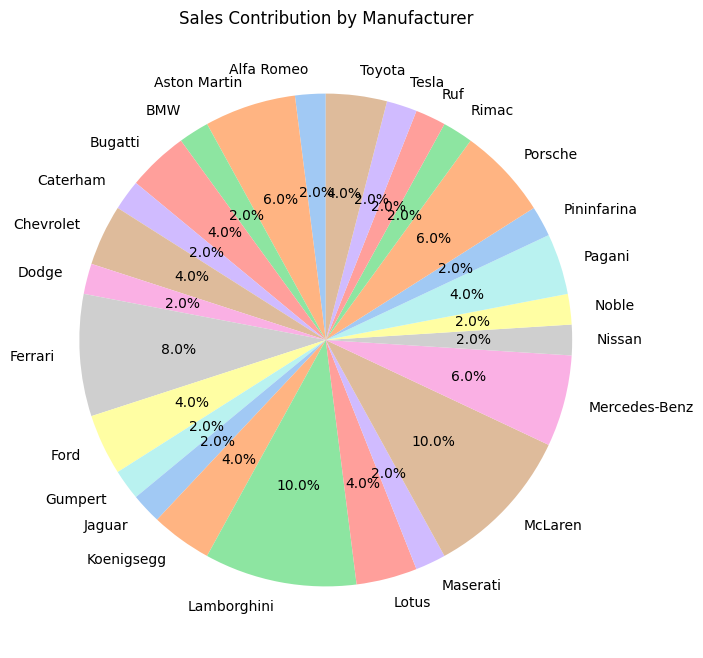

In [30]:
# Sales contribution by manufacturer
sales_by_manufacturer = merged_df.groupby('manufacturer')['sale_id'].count().reset_index()

# Visualization
plt.figure(figsize=(8, 8))
plt.pie(sales_by_manufacturer['sale_id'], labels=sales_by_manufacturer['manufacturer'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Sales Contribution by Manufacturer')
plt.show()

### Insights:

The pie chart will visually represent the sales contribution of each manufacturer relative to the total sales.
The size of each pie slice will indicate the percentage of total sales contributed by that manufacturer.
You can easily identify the manufacturers with the highest and lowest sales contributions.
You can compare the sales contributions of different manufacturers.

## Conclusion
This project aimed to analyze car sales data by merging customer, car, and sales datasets to extract meaningful insights about sales trends, customer demographics, and car models. The analysis was conducted using Python with libraries such as Pandas and Seaborn for data manipulation and visualization.

Key Findings:
1. Sales Performance by Car Model: The analysis revealed that certain car models, particularly SUVs, significantly outperformed others in sales. This highlights a preference among customers for specific vehicle types, indicating a potential area for focused marketing efforts and inventory management.

2. Manufacturer Sales: The data illustrated which manufacturers had the highest sales volumes, helping to identify successful brands in the market. This information can guide strategic partnerships and inventory decisions.

3. Customer Demographics: The distribution of customer ages provided insights into the target demographic for different car models. Understanding the age distribution of customers can inform tailored marketing strategies to attract a broader audience.

4. Sales Trends Over Time: By analyzing sales over time, the project identified patterns and trends, such as seasonal variations in sales. This information is crucial for forecasting and planning future sales strategies.

5. Additional Insights: The project included various visualizations that enhanced understanding of the data, such as histograms for age distribution, bar charts for sales by manufacturer, and line charts for sales trends.

Recommendations:

Targeted Marketing Campaigns: Based on customer demographics and preferences for certain car models, the company should consider targeted marketing campaigns to enhance sales further.

Inventory Management: Focus on stocking popular models identified in the analysis to align inventory with customer demand, thereby optimizing sales and reducing excess stock.

Further Research: Additional analyses could explore factors such as customer feedback, regional sales variations, and competitive analysis to further enhance understanding and performance in the market.

Final Thoughts:

The insights gathered from this project provide a solid foundation for strategic decision-making in sales, marketing, and inventory management. Future analyses could expand upon these findings by incorporating more variables or exploring deeper customer preferences and behaviors. Overall, leveraging data-driven insights is crucial for enhancing sales performance and achieving business growth in the competitive automotive industry.